In [2]:
import pandas as pd
from pathlib import Path
import numpy as np
import seaborn as sns
# from pandas_datareader import data as wb
from datetime import datetime, timedelta
import json
import requests
import random
import os
import csv

In [3]:
csv_path = Path('monthly_data.csv')
monthly_df = pd.read_csv(csv_path, index_col = "Date")


In [4]:
monthly_returns = monthly_df.pct_change()

In [5]:
sharpe_ratio = (monthly_df.mean()) / (monthly_df.std() * np.sqrt(12))

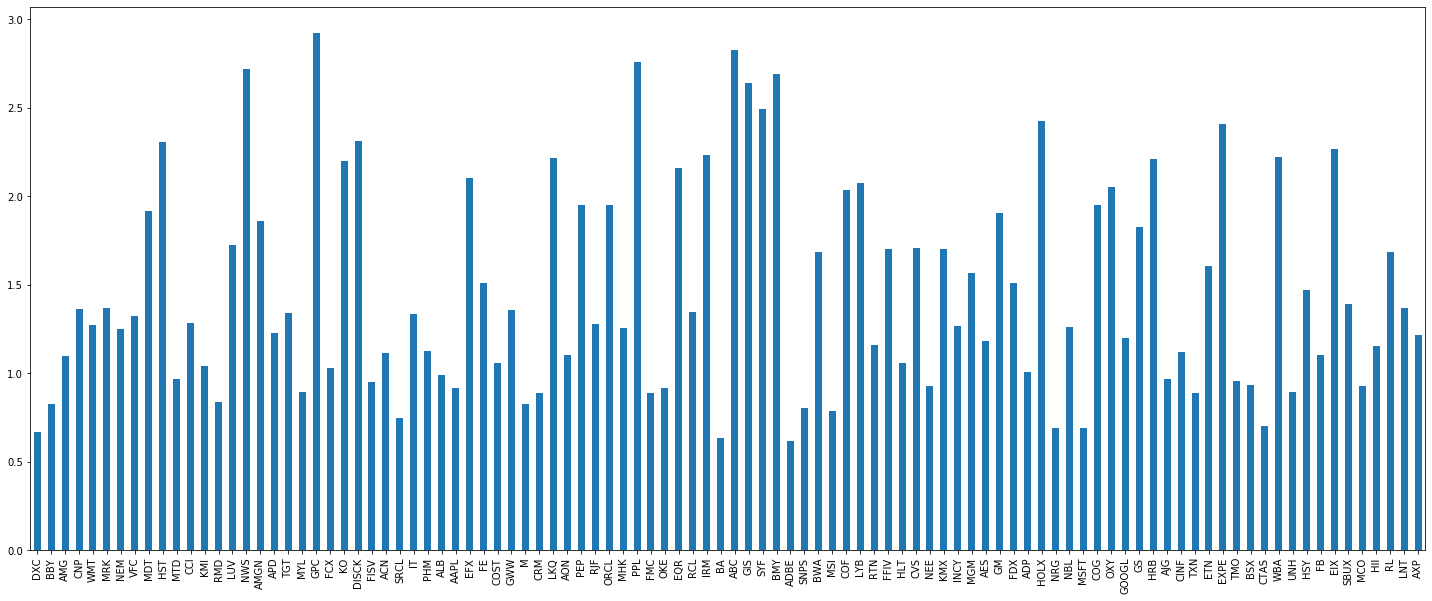

In [6]:
sharpe_ratio.plot(kind='bar', figsize=(25,10))

In [7]:
sharpe_ratio

DXC    0.665931
BBY    0.823915
AMG    1.097986
CNP    1.361230
WMT    1.271096
         ...   
MCO    0.927984
HII    1.154338
RL     1.685028
LNT    1.366718
AXP    1.214408
Length: 100, dtype: float64

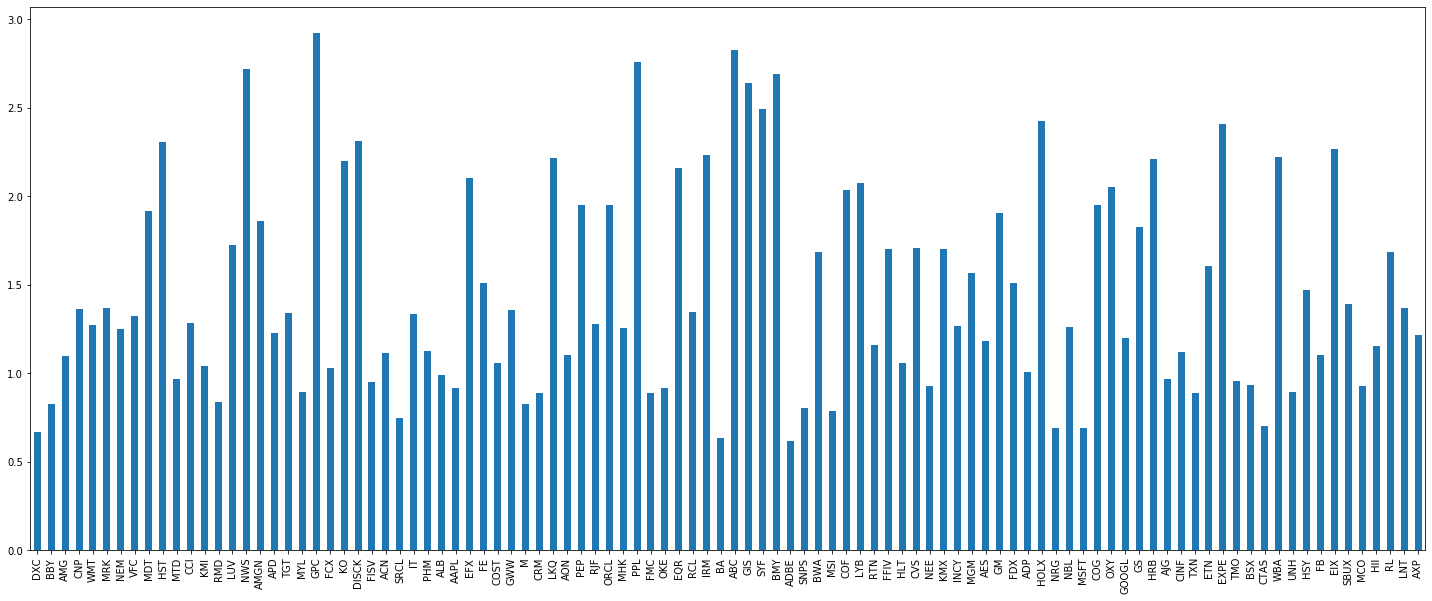

In [8]:
sharpe_ratio.plot(kind='bar', figsize=(25,10))

In [9]:
# creating a dataframe for sharpe ratios and sorting by them to determine stocks with the best
sr_df = sharpe_ratio.to_frame()
sr_df.reset_index(inplace=True)
sr_df.columns = ['Stock','Sharpe Ratio']
sr_df.sort_values(by = 'Sharpe Ratio', ascending = False).head(10)

,Stock,Sharpe Ratio
20,GPC,2.924464
50,ABC,2.824204
43,PPL,2.755488
15,NWS,2.716743
53,BMY,2.688515
51,GIS,2.641281
52,SYF,2.493336
72,HOLX,2.425412
85,EXPE,2.407311
23,DISCK,2.309659


In [10]:
output = 'sharpe_ratios.csv'

In [11]:
# printing randomly selected 100 stocks with Sharpe ratios to a csv file
with open(output, 'w') as file:
    file.write(sr_df.to_csv(index=False))